In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [18]:
data = pd.read_csv("eurostat/eurostat-2013.csv")
data.head(36)

,Nom,Code,tps00001 (2013),tec00115 (2013),teilm (F dec 2013),teilm (M dec 2013),tec00118 (2013),teimf00118 (dec 2013),tsdsc260(2013),tet00002 (2013),tsc00001 (2011),tsc00004 (2012)
0,Autriche,AT,8451860,0.3,5.3,4.9,2.10,2.17,4.1,-5683,2.84,38637
1,Belgique,BE,11161642,0.2,8.1,8.8,1.20,2.43,3.9,14145,2.24,44052
2,Bulgarie,BG,7284552,0.9,11.8,13.7,0.40,3.43,6.6,-3610,0.64,11295
3,Suisse,CH,8039060,1.9,4.6,4.1,0.10,0.90,4.4,18780,2.87,25142
4,Chypre,CY,865878,-5.4,15.5,17.5,0.40,6.00,4.9,-3229,0.46,895
5,République tchèque,CZ,10516125,-0.9,8.0,5.6,1.40,2.20,3.4,13567,1.88,33169
6,Allemagne,DE,80523746,0.4,4.9,5.5,1.60,1.80,4.6,198613,2.98,348416
7,Danemark,DK,5602628,0.4,7.6,6.6,0.50,1.89,4.3,10121,2.98,37675
8,Zone euro,EA17,331090429,-0.4,12.0,11.7,1.40,2.97,5.0,157984,2.17,1149960
9,Estonie,EE,1320174,2.2,7.9,8.7,3.20,0.00,5.5,-1401,2.18,4570


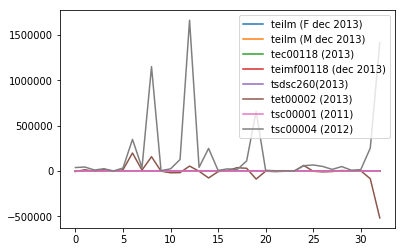

In [40]:
data[['teilm (F dec 2013)', 'teilm (M dec 2013)', 'tec00118 (2013)',
       'teimf00118 (dec 2013)', 'tsdsc260(2013)', 'tet00002 (2013)',
       'tsc00001 (2011)', 'tsc00004 (2012)']].plot()

In [135]:
data['tsc00004 (2012)'] = data['tsc00004 (2012)'].divide(data['tps00001 (2013)'])

In [136]:
data =data.drop(['tps00001 (2013)'], axis=1)

In [137]:
data

,Nom,Code,tec00115 (2013),teilm (F dec 2013),teilm (M dec 2013),tec00118 (2013),teimf00118 (dec 2013),tsdsc260(2013),tet00002 (2013),tsc00001 (2011),tsc00004 (2012)
0,Autriche,AT,0.3,5.3,4.9,2.10,2.17,4.1,-5683,2.84,0.004571
1,Belgique,BE,0.2,8.1,8.8,1.20,2.43,3.9,14145,2.24,0.003947
2,Bulgarie,BG,0.9,11.8,13.7,0.40,3.43,6.6,-3610,0.64,0.001551
3,Suisse,CH,1.9,4.6,4.1,0.10,0.90,4.4,18780,2.87,0.003127
4,Chypre,CY,-5.4,15.5,17.5,0.40,6.00,4.9,-3229,0.46,0.001034
5,République tchèque,CZ,-0.9,8.0,5.6,1.40,2.20,3.4,13567,1.88,0.003154
6,Allemagne,DE,0.4,4.9,5.5,1.60,1.80,4.6,198613,2.98,0.004327
7,Danemark,DK,0.4,7.6,6.6,0.50,1.89,4.3,10121,2.98,0.006725
8,Zone euro,EA17,-0.4,12.0,11.7,1.40,2.97,5.0,157984,2.17,0.003473
9,Estonie,EE,2.2,7.9,8.7,3.20,0.00,5.5,-1401,2.18,0.003462


In [127]:
print(np.std(data))

tec00115 (2013)               1.993833
teilm (F dec 2013)            5.723112
teilm (M dec 2013)            5.012914
tec00118 (2013)               0.918168
teimf00118 (dec 2013)         1.757474
tsdsc260(2013)                1.868152
tet00002 (2013)          104616.124303
tsc00001 (2011)               0.928310
tsc00004 (2012)               0.001560
dtype: float64


In [23]:
standardscaler = preprocessing.StandardScaler()

In [24]:
X = data.iloc[:,2:11]
#y = (0.3-np.mean(data['tec00115 (2013)']))/np.std(data['tec00115 (2013)'][0])
Y= X.columns
Y


Index(['tps00001 (2013)', 'tec00115 (2013)', 'teilm (F dec 2013)',
       'teilm (M dec 2013)', 'tec00118 (2013)', 'teimf00118 (dec 2013)',
       'tsdsc260(2013)', 'tet00002 (2013)', 'tsc00001 (2011)'],
      dtype='object')

In [25]:
X_norm = standardscaler.fit_transform(X)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.5/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


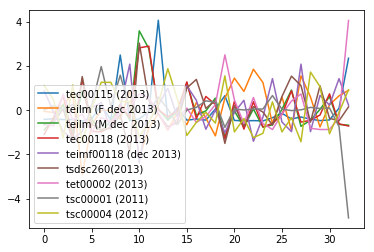

In [39]:
pd.DataFrame(X_norm,columns = data.iloc[:,3:12].columns).plot()
plt.legend(loc="lower left")

In [42]:
pca = PCA()

In [43]:
X_pca =pca.fit_transform(X_norm)
X_pca.shape

(33, 9)

In [ ]:
Y.values.shape

In [45]:

pca1_pca2 = pd.DataFrame(data=X_pca, columns = Y)

In [73]:
n = np.size(X_norm, 0)
p = np.size(X_norm, 1)
eigval = float(n-1)/n*pca.explained_variance_
pd.DataFrame(float(n-1)/n*pca.explained_variance_ratio_)

,0
0,0.375376
1,0.211645
2,0.121765
3,0.096829
4,0.073832
5,0.042728
6,0.022448
7,0.021709
8,0.003364


In [89]:
sqrt_eigval = np.sqrt(eigval)
corvar = np.zeros((p,p))
for k in range(p):
    corvar [:, k] = pca.components_[k,:]*sqrt_eigval[k]
pd.DataFrame(corvar,index=data.iloc[:,3:12].columns)

,0,1,2,3,4,5,6,7,8
tec00115 (2013),-0.146630,0.523986,-0.524118,0.437136,0.466037,-0.095557,-0.057030,-0.092568,0.002760
teilm (F dec 2013),-0.619773,0.233429,0.582349,-0.093454,0.354935,0.152845,-0.236220,0.091582,0.000402
teilm (M dec 2013),0.942252,0.033003,-0.113200,0.079084,-0.023520,0.244979,-0.124790,0.017901,-0.124672
tec00118 (2013),0.935051,0.034275,-0.033474,0.102658,0.013074,0.306872,-0.058616,-0.006358,0.122588
teimf00118 (dec 2013),-0.419139,-0.137326,0.249117,0.801949,-0.300682,0.069546,0.005602,0.070656,-0.003467
tsdsc260(2013),0.842538,0.121650,0.149672,0.083021,-0.046813,-0.431980,-0.153955,0.182398,0.016378
tet00002 (2013),0.065487,0.935016,0.040827,-0.052151,-0.012097,0.099639,0.231793,0.230662,-0.007922
tsc00001 (2011),0.075216,-0.851531,-0.141292,0.076147,0.412776,0.041257,0.124969,0.236130,-0.003923
tsc00004 (2012),-0.648607,-0.001732,-0.629502,-0.153463,-0.279690,0.082600,-0.192890,0.192202,0.016863
